In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
import numpy as np

dataframe = pd.read_pickle('scrobbles.pkl')
dataframe = dataframe.set_index('time').sort_index()
mask = dataframe.index > dt(2009, 1, 1)
dataframe = dataframe[mask]

In [2]:
# Make a table of album name vs time indexed
unbinned = pd.get_dummies(dataframe['album'])

# Remove any duplicate scrobbles with the same time
unbinned = unbinned.groupby('time').min()

# Bin the table in 100 day groups
binned = unbinned.groupby(pd.TimeGrouper('30D')).sum()

# Sort the columns in descending order
sort = np.argsort(binned.to_numpy().sum(axis=0))
binned = binned.reindex(binned.columns[sort[::-1]], axis=1)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


Text(0.5, 0, 'Mean monthly listens')

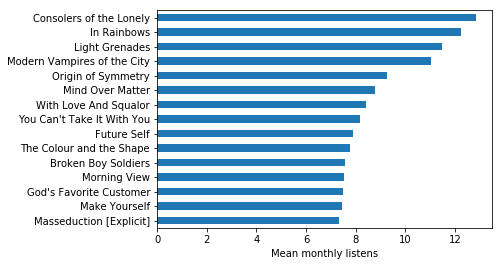

In [3]:
ax = binned.mean().sort_values()[-15:].plot('barh')
ax.set_xlabel('Mean monthly listens')

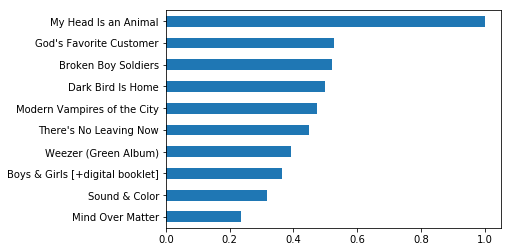

In [4]:
total_share = binned.divide(binned.sum(axis=1), 'index')

total_share.max().sort_values()[-10:].plot('barh')

# .plot(figsize=(10, 4))
plt.savefig('tmp/monthly_peak_album_share.png', bbox_inches='tight', dpi=200)

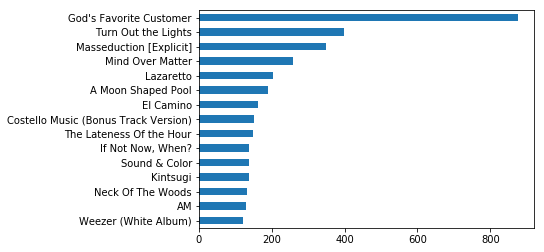

In [5]:
(binned.max() - binned.mean()).sort_values()[-15:].plot('barh')

In [6]:
monthly = unbinned.set_index(unbinned.index.month).groupby('time').sum()

# Sort the columns in descending order
sort = np.argsort(monthly.to_numpy().sum(axis=0))
monthly = monthly.reindex(monthly.columns[sort[::-1]], axis=1)

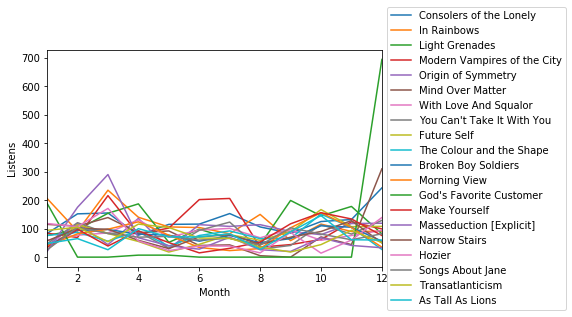

In [9]:
ax = plt.gca()
monthly[monthly.columns[:20]].plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Month')
plt.ylabel('Listens')
plt.savefig('tmp/seasons_album.png', bbox_inches='tight', dpi=200)